In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from google.colab import files

In [2]:
# Step 2: Generate Synthetic Sales Data
date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
np.random.seed(42)  # For reproducibility
sales_data = np.random.poisson(lam=20, size=len(date_range))  # Average sales of 20 per day
sales_df = pd.DataFrame(data={'Date': date_range, 'Sales': sales_data})
sales_df.set_index('Date', inplace=True)

# Display the first few rows
print(sales_df.head())

            Sales
Date             
2022-01-01     23
2022-01-02     15
2022-01-03     21
2022-01-04     25
2022-01-05     15


In [3]:
# Step 3: Save the DataFrame to a CSV File
sales_df.to_csv('synthetic_sales_data.csv')
print("Synthetic sales data saved as 'synthetic_sales_data.csv'.")
# Download the Dataset
files.download('synthetic_sales_data.csv')

Synthetic sales data saved as 'synthetic_sales_data.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# Step 5: Load and Inspect Data
data = sales_df.copy()  # Using the generated synthetic data
print(data.head())
print(data.info())
print(data.describe())

            Sales
Date             
2022-01-01     23
2022-01-02     15
2022-01-03     21
2022-01-04     25
2022-01-05     15
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB
None
            Sales
count  365.000000
mean    19.695890
std      4.506175
min      7.000000
25%     17.000000
50%     20.000000
75%     23.000000
max     32.000000


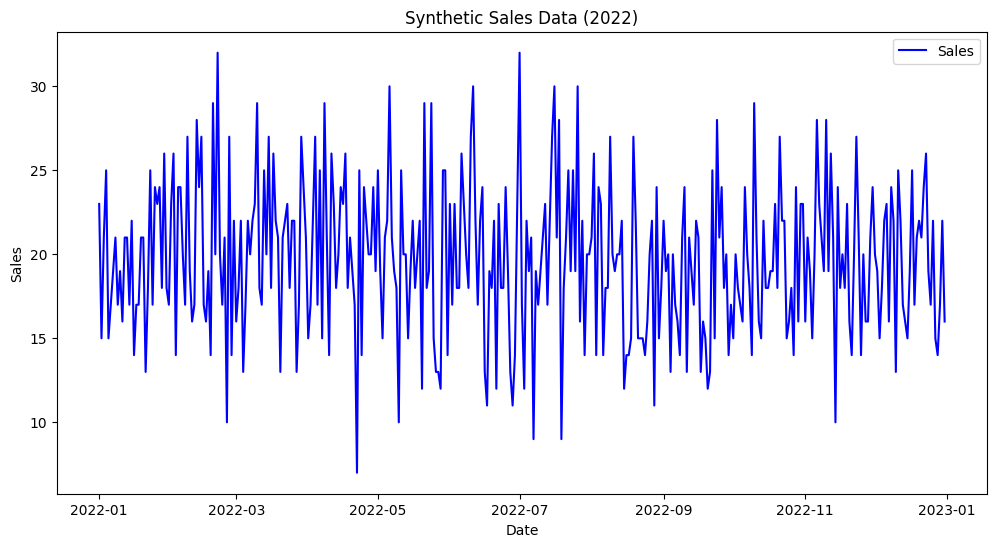

In [5]:
# Step 6: Visualize the Sales Data
plt.figure(figsize=(12, 6))
plt.plot(data['Sales'], label='Sales', color='blue')
plt.title('Synthetic Sales Data (2022)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

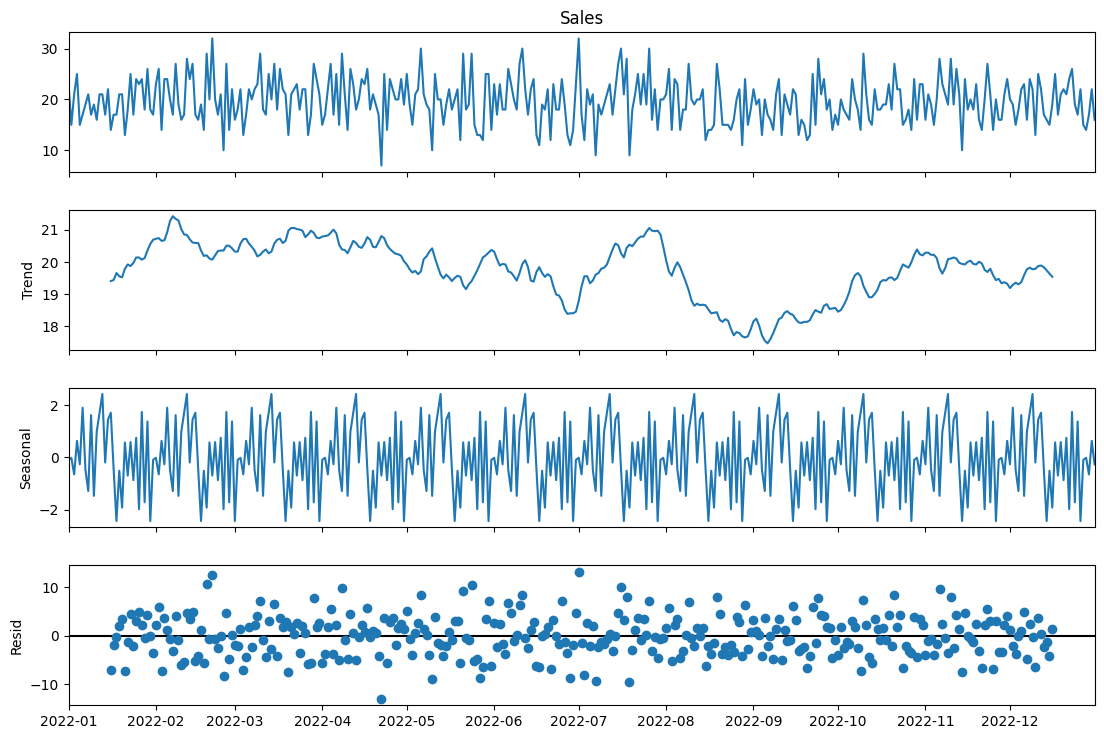

In [6]:
# Step 7: Decompose the Time Series
decomposition = seasonal_decompose(data['Sales'], model='additive', period=30)  # Monthly seasonality
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

In [7]:
# Step 8: Train-Test Split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Display the size of train and test sets
print(f"Training set size: {len(train)}")
print(f"Testing set size: {len(test)}")

Training set size: 292
Testing set size: 73


In [8]:
# Step 9: Build and Train the Model
model = ARIMA(train['Sales'], order=(1, 1, 1))  # Adjust parameters (p, d, q) as needed
arima_model = model.fit()
print(arima_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  292
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -860.596
Date:                Mon, 28 Oct 2024   AIC                           1727.193
Time:                        08:43:44   BIC                           1738.213
Sample:                    01-01-2022   HQIC                          1731.607
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0704      0.062     -1.136      0.256      -0.192       0.051
ma.L1         -0.9816      0.014    -67.761      0.000      -1.010      -0.953
sigma2        21.4350      1.897     11.296      0.0

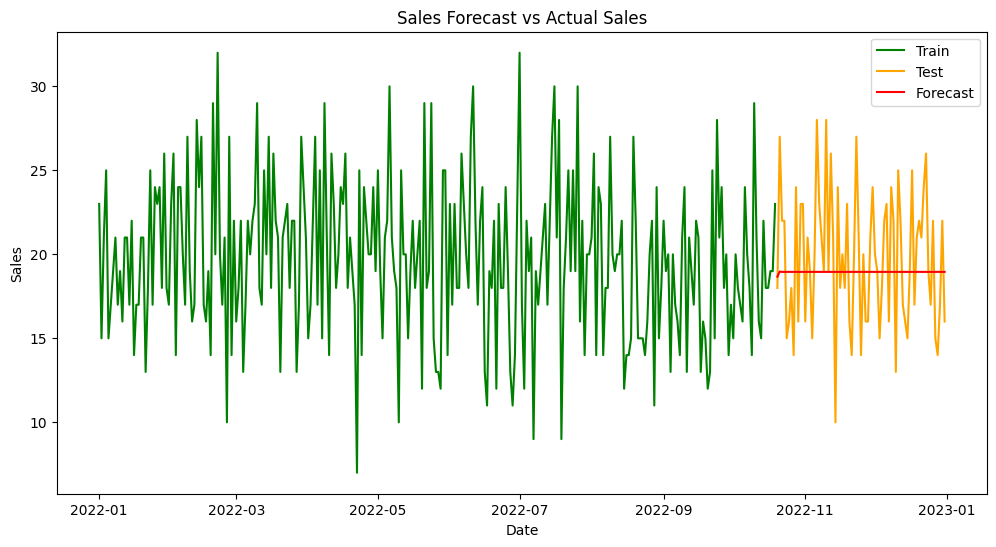

Mean Squared Error: 16.071076812276686


In [9]:
# Step 10: Model Forecasting and Evaluation
forecast = arima_model.forecast(steps=len(test))

# Plotting actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sales'], label='Train', color='green')
plt.plot(test.index, test['Sales'], label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Sales Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Calculate MSE
mse = mean_squared_error(test['Sales'], forecast)
print(f'Mean Squared Error: {mse}')

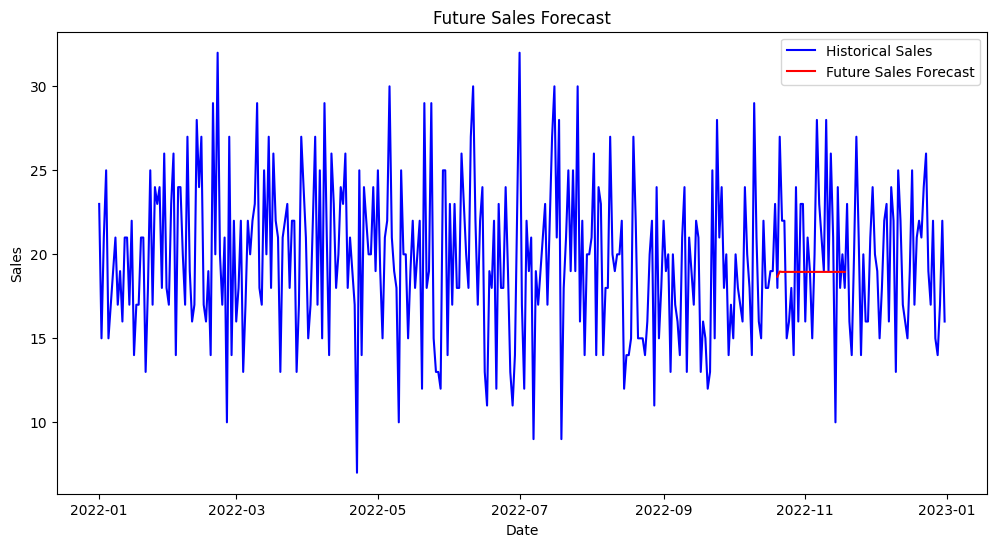

In [10]:
# Step 11: Forecast Future Sales
future_forecast = arima_model.get_forecast(steps=30)  # Forecasting the next 30 days
forecast_df = future_forecast.conf_int()
forecast_df['Forecast'] = future_forecast.predicted_mean

# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], label='Historical Sales', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Future Sales Forecast', color='red')
plt.title('Future Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()